In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
aero=pd.read_csv(r"C:\Users\91947\Downloads\Data_Train.csv")

In [6]:
aero.shape

(10683, 11)

In [7]:
aero.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
aero["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
aero.dropna(inplace=True)

In [10]:
aero.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
aero["Journey_day"]=pd.to_datetime(aero["Date_of_Journey"],format="%d/%m/%Y").dt.day
aero["Journey_month"]=pd.to_datetime(aero["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [12]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
aero["Dep_hour"]=pd.to_datetime(aero["Dep_Time"]).dt.hour

In [14]:
aero["Dep_min"]=pd.to_datetime(aero["Dep_Time"]).dt.minute

In [15]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
aero.drop(["Dep_Time"],axis=1,inplace=True)

In [17]:
aero["Arrival_hour"]=pd.to_datetime(aero["Arrival_Time"]).dt.hour
aero["Arrival_min"]=pd.to_datetime(aero["Arrival_Time"]).dt.minute

In [18]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
duration=list(aero["Duration"])
len(duration)

10682

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


<AxesSubplot:>

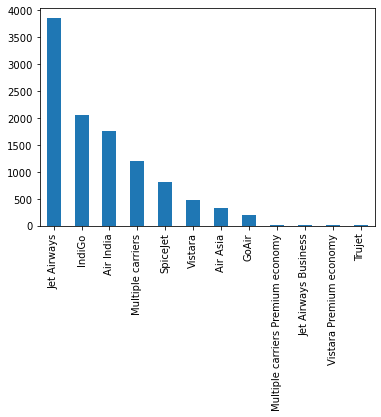

In [20]:
print(aero['Airline'].value_counts())
aero['Airline'].value_counts().plot(kind = 'bar') 

In [21]:

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip() +" 0m"
        else:
            duration[i]= "0h "+ duration[i]
            
    

In [22]:
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [23]:
aero["Duration_hours"]=duration_hours
aero["Duration_mins"]=duration_mins

In [24]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
aero.drop(["Duration"],axis=1,inplace=True)

In [26]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [27]:
aero["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

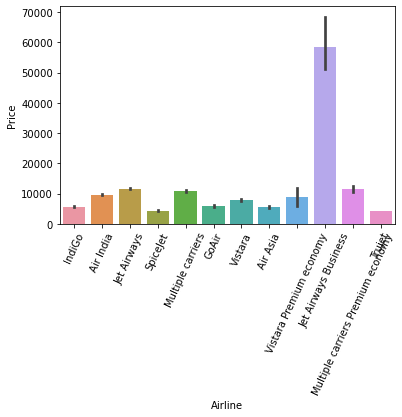

In [28]:
sns.barplot(x ="Airline" , y = "Price" , data = aero )  
plt.xticks(rotation = 65) 
plt.show() 

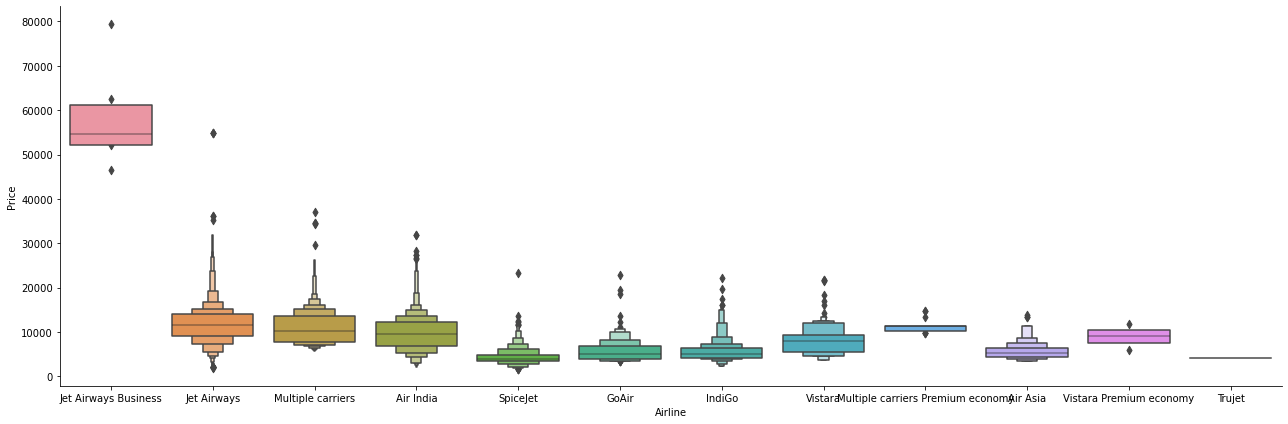

In [29]:
sns.catplot(y="Price",x="Airline",data=aero.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [30]:
airline=aero[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [31]:
aero["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

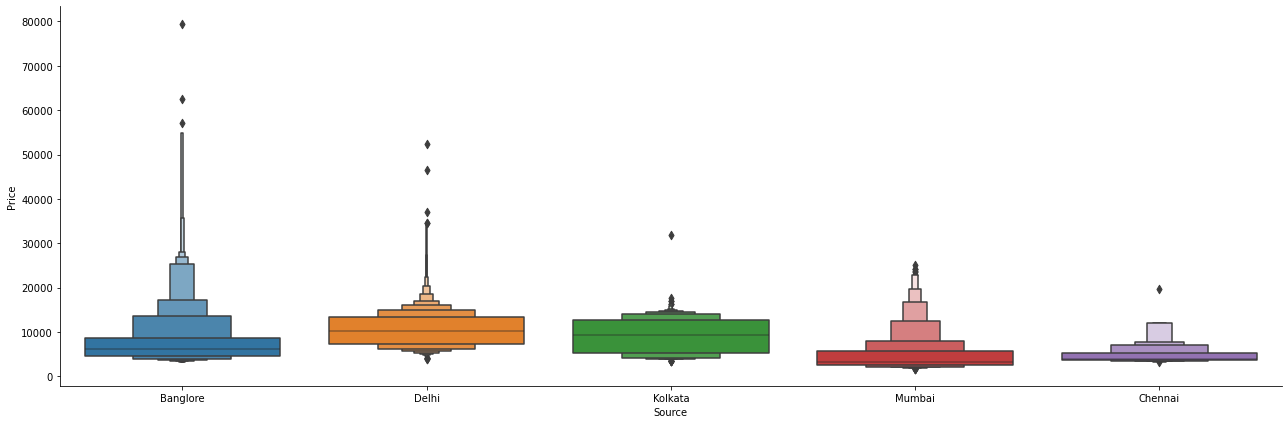

In [32]:
sns.catplot(y="Price",x="Source",data=aero.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [33]:
source=aero[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [34]:
aero["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

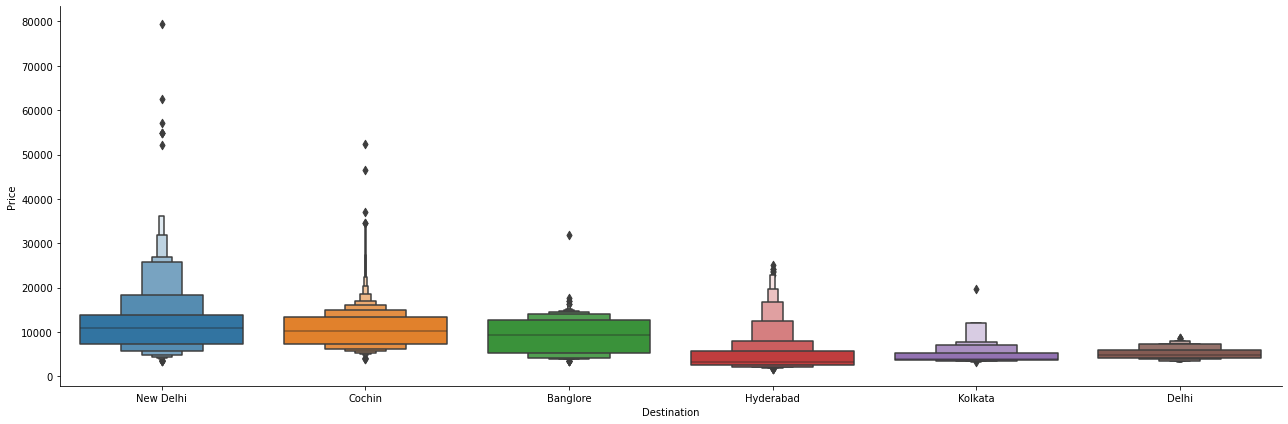

In [35]:
sns.catplot(y="Price",x="Destination",data=aero.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [36]:
des=aero[["Destination"]]
des=pd.get_dummies(des,drop_first=True)
des.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
aero.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [38]:
aero["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
aero.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [40]:
aero.head()

,Airline,Date_of_Journey,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,13:15,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,23:30,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,21:35,1,13302,1,3,16,50,21,35,4,45


In [41]:
aero.drop(["Arrival_Time"],axis=1,inplace=True)

In [42]:
aero.head()


,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
df=pd.concat([aero,airline,source,des],axis=1)

In [44]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [46]:
df.head()

,Date_of_Journey,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,2,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,2,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,1,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [47]:
df.shape

(10682, 31)

In [48]:
test=pd.read_csv(r"C:\Users\91947\Downloads\Data_Train.csv")

In [49]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
test.shape

(10683, 11)

In [51]:
test["Journey_day"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.day
test["Journey_month"]=pd.to_datetime(test["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [52]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [53]:
test.drop(["Date_of_Journey"],axis=1,inplace=True)

In [54]:
test["Dep_hour"]=pd.to_datetime(test["Dep_Time"]).dt.hour
test["Dep_min"]=pd.to_datetime(test["Dep_Time"]).dt.minute

In [55]:
test.drop(["Dep_Time"],axis=1,inplace=True)

In [56]:
test["Arrival_hour"]=pd.to_datetime(test["Arrival_Time"]).dt.hour
test["Arrival_min"]=pd.to_datetime(test["Arrival_Time"]).dt.minute

In [57]:
test.drop(["Arrival_Time"],axis=1,inplace=True)

In [58]:
durations=list(test["Duration"])
len(durations)

10683

In [59]:
for i in range(len(durations)):
    if len(durations[i].split()) !=2:
        if "h" in durations[i]:
            durations[i]=durations[i].strip() +" 0m"
        else:
            durations[i]= "0h "+ durations[i]

In [60]:
durations_hours=[]
durations_mins=[]
for i in range(len(durations)):
    durations_hours.append(int(durations[i].split(sep="h")[0]))
    durations_mins.append(int(durations[i].split(sep="m")[0].split()[-1]))

In [61]:
test["Duration_hours"]=durations_hours
test["Duration_mins"]=durations_mins

In [62]:
test.drop(["Duration"],axis=1,inplace=True)

In [63]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [64]:
airline=test[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [65]:
source=test[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [66]:
des=test[["Destination"]]
des=pd.get_dummies(des,drop_first=True)
des.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [67]:
test.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [68]:
test.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [69]:
tests=pd.concat([test,airline,source,des],axis=1)
tests.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [70]:
tests.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [71]:
tests.shape

(10683, 30)

In [72]:
tests.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [73]:
df.columns

Index(['Date_of_Journey', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [74]:
tests.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [75]:
df.head()

,Date_of_Journey,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,2,7662,1,5,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,2,13882,9,6,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,1,6218,12,5,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [76]:
x.head()

NameError: name 'x' is not defined

In [77]:
x=df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [78]:
y=df["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

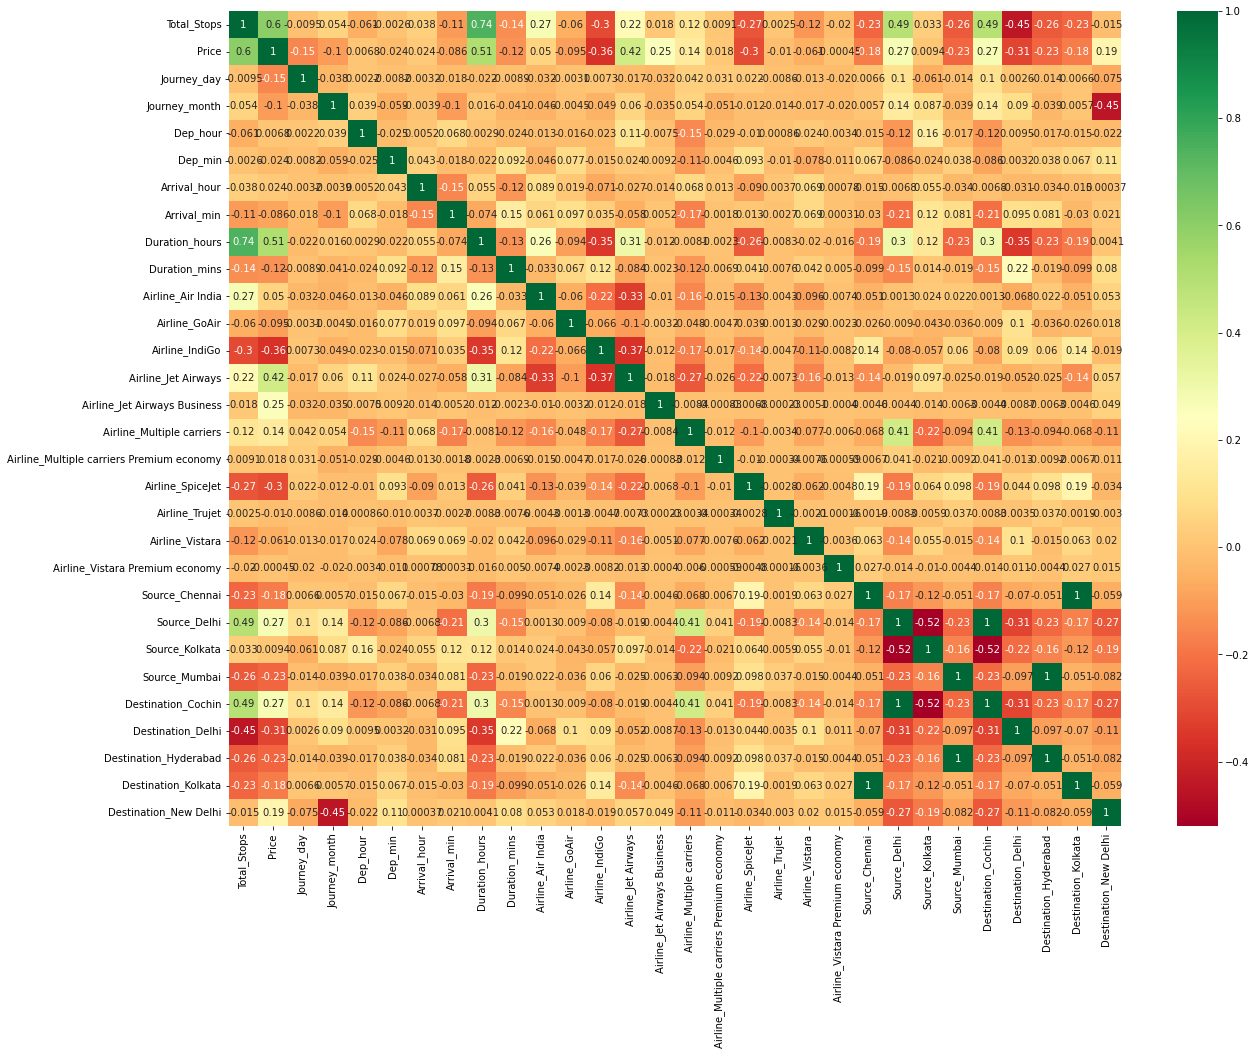

In [79]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

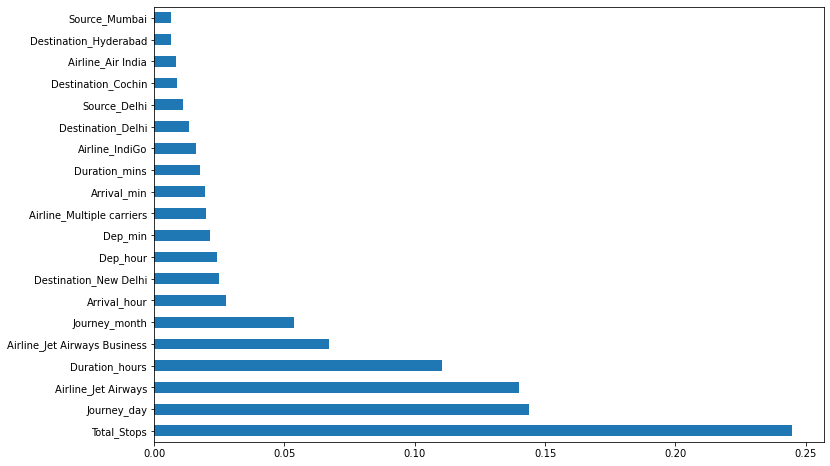

In [81]:
plt.figure(figsize=(12,8))
feat_importance=pd.Series(selection.feature_importances_,index=x.columns)
feat_importance.nlargest(20).plot(kind="barh")
plt.show()

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [83]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [84]:
y_pred=reg_rf.predict(x_test)

In [85]:
reg_rf.score(x_train,y_train)

0.9557363085226329

C:\Users\91947\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


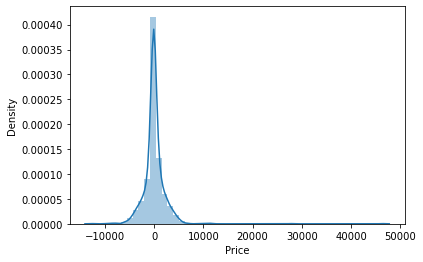

In [86]:
sns.distplot(y_test-y_pred)
plt.show()

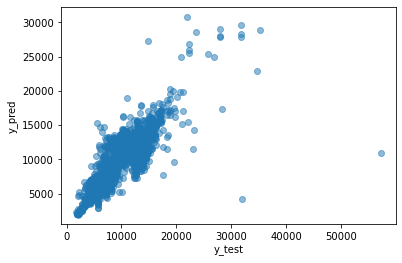

In [87]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
from sklearn import metrics

In [89]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1229.3034394504912
MSE: 4913524.12061023
RMSE: 2216.6470446623275


In [90]:
metrics.r2_score(y_test,y_pred)

0.7593609487414384

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [93]:
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}

In [94]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [95]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [97]:
pred=rf_random.predict(x_test)

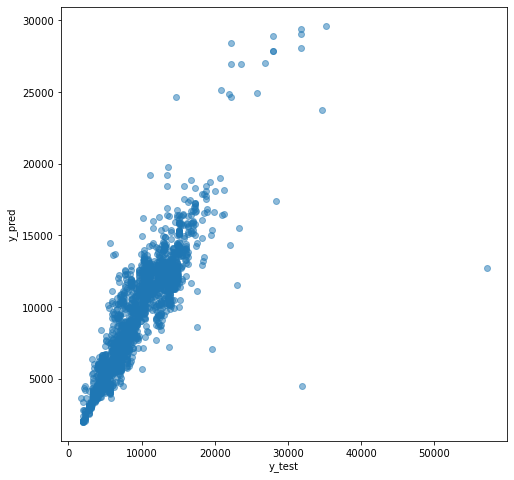

In [98]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

C:\Users\91947\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


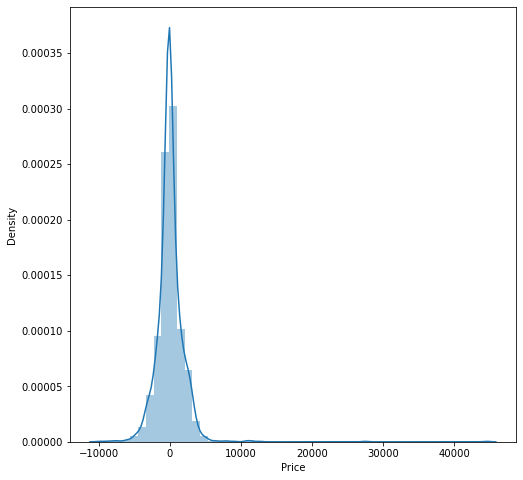

In [99]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-pred)
plt.show()

In [100]:
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 1181.0205208250056
MSE: 4227281.886721044
RMSE: 2056.0354779820905


In [101]:
metrics.r2_score(y_test,pred)

0.7929695514557242